In [5]:
# a. import
import ipywidgets as widgets
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import HouseholdSpecializationModel
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
mo = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1

In [9]:
# Define the values of alpha and sigma to use
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1.5]
mo = HouseholdSpecializationModelClass()

#Loop over all combinations of alpha and sigma values and find each solution
for alpha in alpha_values:
    for sigma in sigma_values:
        mo.par.alpha = alpha
        mo.par.sigma = sigma
        res = mo.solve_discrete()
        print(f'({alpha},{sigma}): x = {res.HF/res.HM:.3f}')
        


(0.25,0.5): x = 0.545
(0.25,1): x = 0.308
(0.25,1.5): x = 0.214
(0.5,0.5): x = 1.000
(0.5,1): x = 1.000
(0.5,1.5): x = 1.000
(0.75,0.5): x = 1.833
(0.75,1): x = 3.250
(0.75,1.5): x = 4.667


## Question 2:


[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]


Text(0, 0.5, 'log ($H_F$ / $H_M$)')

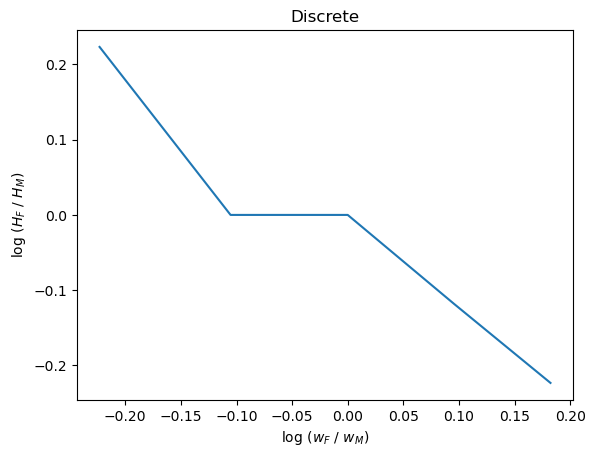

In [22]:
#Returner H relation for each value of wF
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
wM = 1.0
Log_ratio = []
import math
for wF in wF_values:
    mo.par.wF = wF
    mo.par.wM = wM
    opt = mo.solve_discrete()
    Log_ratio.append(math.log(opt.HF/opt.HM))
print(Log_ratio)

# Plot H realtion against W relation 
plt.plot(np.log(wF_values), Log_ratio)
plt.title('Discrete')
plt.xlabel('log ($w_F$ / $w_M$)')
plt.ylabel('log ($H_F$ / $H_M$)')



## Question 3

/Users/andersbruun/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


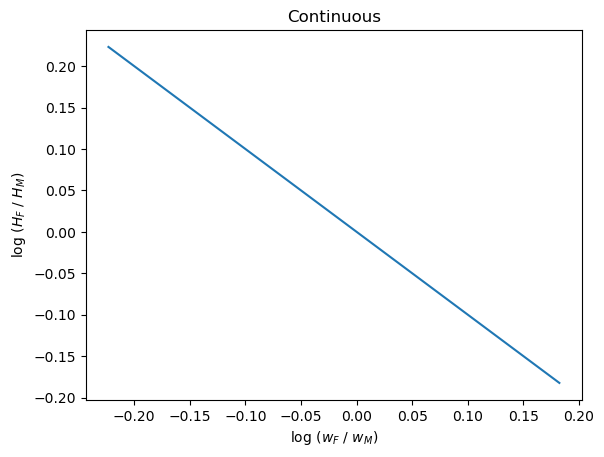

In [26]:
# Relation between WF and WM
mo.par.alpha = 0.5
mo.par.sigma = 1
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
HF_HM_c = np.empty(5)
wF_wM_c = np.empty(5)

#Continuous:
for i, wF in enumerate(mo.par.wF_vec):
    mo.par.wF = wF
    opt = mo.solve_con()

    HF_HM_c[i] = np.log(opt.HF/opt.HM)
    wF_wM_c[i] = np.log(mo.par.wF/mo.par.wM)
        
#Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Continuous')
ax.plot(wF_wM_c, HF_HM_c)
ax.set_xlabel("log ($w_F$ / $w_M$)")
ax.set_ylabel("log ($H_F$ / $H_M$)")
plt.show()


## Question 4: